项目说明：由于前期数据提取，模型建立过程中存在很多问题。针对之前的各种疑问，重新提取了数据，利用更加规范的形式来处理数据建立模型。
这个notebook中主要是对数据的一些前期探索和预处理、可视化的工作

数据库连接

In [1]:
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
engine= create_engine('postgresql://postgres@localhost:5432/mimic',echo = True)
sql='select * from mimiciii.secondData'
data=pd.read_sql_query(sql, con=engine, index_col=None, coerce_float=True, params=None, parse_dates=None,chunksize=None)

2018-05-10 09:30:10,380 INFO sqlalchemy.engine.base.Engine select version()
2018-05-10 09:30:10,381 INFO sqlalchemy.engine.base.Engine {}
2018-05-10 09:30:10,382 INFO sqlalchemy.engine.base.Engine select current_schema()
2018-05-10 09:30:10,383 INFO sqlalchemy.engine.base.Engine {}
2018-05-10 09:30:10,385 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2018-05-10 09:30:10,386 INFO sqlalchemy.engine.base.Engine {}
2018-05-10 09:30:10,389 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2018-05-10 09:30:10,389 INFO sqlalchemy.engine.base.Engine {}
2018-05-10 09:30:10,391 INFO sqlalchemy.engine.base.Engine show standard_conforming_strings
2018-05-10 09:30:10,392 INFO sqlalchemy.engine.base.Engine {}
2018-05-10 09:30:10,394 INFO sqlalchemy.engine.base.Engine select * from mimiciii.secondData
2018-05-10 09:30:10,395 INFO sqlalchemy.engine.base.Engine {}


数据整体了解

In [64]:
data.head()

,subject_id,hadm_id,icustay_id,charttime,pao2,spo2,fio2,hr,temp,nbps,...,age,ethnicity,admission_type,gender,height_first,height_min,height_max,weight_first,weight_min,weight_max
0,1314,161745,204270,2126-12-30 15:35:00,198.0,96.0,50.0,86.0,37.555599,NaN,...,70.4842,OTHER,EMERGENCY,M,180.34,180.34,180.34,100.0,100.0,109.8
1,1314,161745,204270,2126-12-30 14:17:00,188.0,100.0,50.0,95.0,37.777802,NaN,...,70.4842,OTHER,EMERGENCY,M,180.34,180.34,180.34,100.0,100.0,109.8
2,1314,161745,204270,2126-12-30 08:03:00,142.0,100.0,50.0,92.0,38.333333,NaN,...,70.4842,OTHER,EMERGENCY,M,180.34,180.34,180.34,100.0,100.0,109.8
3,1314,161745,204270,2126-12-30 04:32:00,105.0,100.0,50.0,100.0,38.944444,NaN,...,70.4842,OTHER,EMERGENCY,M,180.34,180.34,180.34,100.0,100.0,109.8
4,1314,161745,204270,2126-12-30 02:40:00,116.0,100.0,50.0,106.0,39.444444,134.0,...,70.4842,OTHER,EMERGENCY,M,180.34,180.34,180.34,100.0,100.0,109.8


In [4]:
#观察数据的最大值、最小值、平均值、中位数等，可以看出是否存在异常值
data.describe()

,subject_id,hadm_id,icustay_id,pao2,spo2,fio2,hr,temp,nbps,nbpd,...,gcsmotor,gcsverbal,gcseyes,age,height_first,height_min,height_max,weight_first,weight_min,weight_max
count,195766.000000,195766.000000,195766.000000,195766.000000,193788.000000,179758.000000,194527.000000,185786.000000,53028.000000,52880.000000,...,177518.000000,177428.000000,177724.000000,195766.000000,154892.000000,154892.000000,154892.000000,194803.000000,194803.000000,194803.000000
mean,31531.171393,150694.162480,250276.891610,125.205564,97.024466,54.466941,88.946707,37.104551,114.889328,56.734607,...,4.257399,3.155483,2.586674,67.948925,169.589837,169.572955,170.131169,86.673485,84.131689,94.860322
std,26891.176267,28738.898737,28699.036011,68.695434,4.134335,18.264322,17.665136,0.914936,23.726985,15.292901,...,2.028651,1.550719,1.237336,37.258348,17.268233,17.272872,15.195771,27.000886,25.619175,30.113277
min,3.000000,100009.000000,200003.000000,3.000000,0.500000,20.999999,12.000000,22.000000,0.200000,10.000000,...,1.000000,1.000000,1.000000,16.474200,5.080000,5.080000,5.080000,20.500000,0.600000,20.500000
25%,11554.000000,126256.000000,225796.000000,84.000000,96.000000,40.000001,77.000000,36.555556,98.000000,46.000000,...,1.000000,1.000000,1.000000,53.275200,162.560000,162.560000,162.560000,70.000000,67.650000,75.500000
50%,23210.000000,150624.000000,250436.000000,106.000000,98.000000,50.000000,88.000000,37.111113,112.000000,55.000000,...,5.000000,4.000000,3.000000,66.043200,170.180000,170.180000,170.180000,82.000000,80.000000,90.400000
75%,46411.000000,176126.000000,275324.000000,140.000000,100.000000,60.000000,100.000000,37.700001,130.000000,65.000000,...,6.000000,4.000000,4.000000,76.535700,177.800000,177.800000,177.800000,99.000000,96.200000,107.000000
max,99995.000000,199995.000000,299995.000000,691.000000,100.000000,100.000000,285.000000,42.777802,263.000000,200.000000,...,6.000000,5.000000,4.000000,301.076100,454.660000,454.660000,454.660000,472.000000,296.800000,472.000000


pao2：最小值是3<br>
SpO2：最小值0.5 大部分集中在98%<br>
FiO2：不存在异常值，最小值约21%，<br>
心率：应该没有异常值<br>
体温：<br>
升高：最小值只有5，这应该是一个记录错误的数据，即使儿童也不会存在这么小的身高<br>
体重：也存在部分异常值，大部分数据分布式正常的<br>
中间还有一些变量没有去看，应该还有不少异常值需要处理

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195766 entries, 0 to 195765
Data columns (total 38 columns):
subject_id        195766 non-null int64
hadm_id           195766 non-null int64
icustay_id        195766 non-null int64
charttime         195766 non-null datetime64[ns]
pao2              195766 non-null float64
spo2              193788 non-null float64
fio2              179758 non-null float64
hr                194527 non-null float64
temp              185786 non-null float64
nbps              53028 non-null float64
nbpd              52880 non-null float64
nbpm              52727 non-null float64
abps              186230 non-null float64
abpd              186230 non-null float64
abpm              188677 non-null float64
rr                194409 non-null float64
tv                142728 non-null float64
pip               140032 non-null float64
plap              105177 non-null float64
mv                173426 non-null float64
map               170363 non-null float64
peep     

通过以上的分析，可以绘制一张关于缺失比例的图，来直观的观察数据缺失的情况。

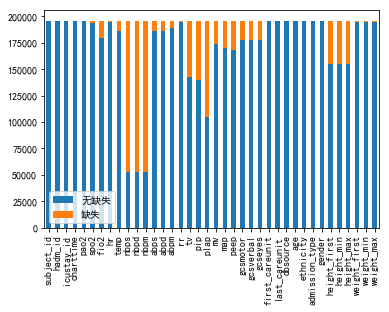

In [19]:
isnan=data.isnull().sum()
notnan=data.notnull().sum()
value=pd.DataFrame({"无缺失":notnan,"缺失":isnan})
value.plot(kind='bar',stacked=True)

缺失数据的整体分布情况，观察是否存在异常值

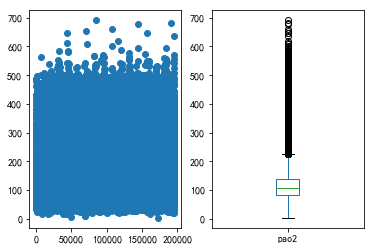

In [41]:
plt.subplot2grid((1,2),(0,0))
plt.scatter(range(len(data)),data['pao2'])
plt.subplot2grid((1,2),(0,1))
data.pao2.plot(kind='box')

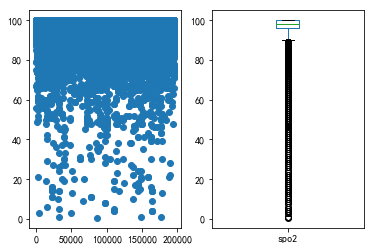

In [42]:
plt.subplot2grid((1,2),(0,0))
plt.scatter(range(len(data)),data['spo2'])
plt.subplot2grid((1,2),(0,1))
data['spo2'].plot.box()
#spo2有很多异常值，但是这些值是否不合理，还需要讨论，

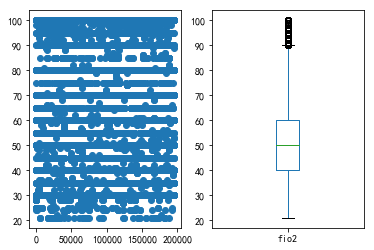

In [43]:
plt.subplot2grid((1,2),(0,0))
plt.scatter(range(len(data)),data['fio2'])
plt.subplot2grid((1,2),(0,1))
data['fio2'].plot.box()
#这个参数没有异常值，比较好

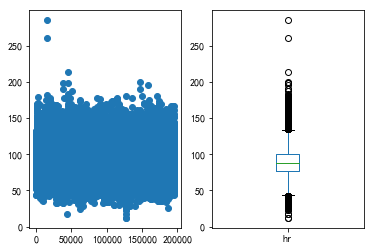

In [44]:
plt.subplot2grid((1,2),(0,0))
plt.scatter(range(len(data)),data['hr'])
plt.subplot2grid((1,2),(0,1))
data['hr'].plot.box()
#心率超过200 ，感觉有点问题

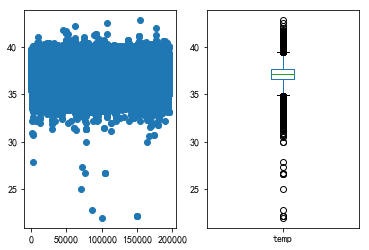

In [45]:
plt.subplot2grid((1,2),(0,0))
plt.scatter(range(len(data)),data['temp'])
plt.subplot2grid((1,2),(0,1))
data['temp'].plot.box()
#体温低于30度，是什么情况，难道这个人凉了

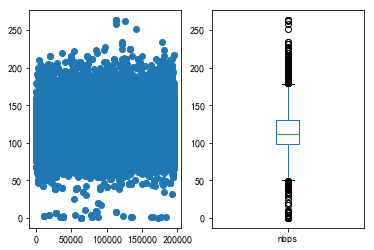

In [46]:
plt.subplot2grid((1,2),(0,0))
plt.scatter(range(len(data)),data['nbps'])
plt.subplot2grid((1,2),(0,1))
data['nbps'].plot.box()

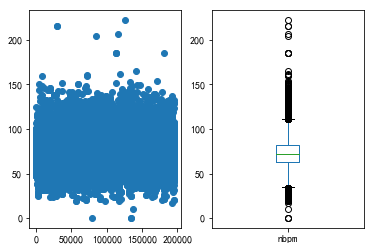

In [47]:
plt.subplot2grid((1,2),(0,0))
plt.scatter(range(len(data)),data['nbpm'])
plt.subplot2grid((1,2),(0,1))
data['nbpm'].plot.box()

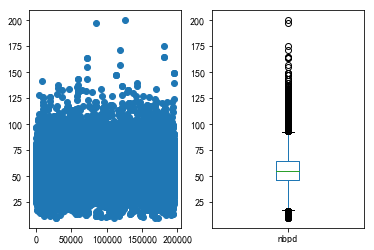

In [48]:
plt.subplot2grid((1,2),(0,0))
plt.scatter(range(len(data)),data['nbpd'])
plt.subplot2grid((1,2),(0,1))
data['nbpd'].plot.box()
#部分舒张压太高了，达到了200

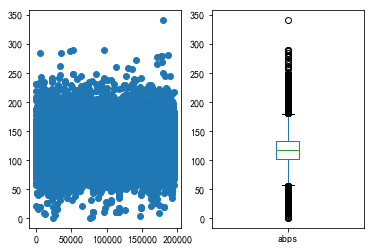

In [49]:
plt.subplot2grid((1,2),(0,0))
plt.scatter(range(len(data)),data['abps'])
plt.subplot2grid((1,2),(0,1))
data['abps'].plot.box()

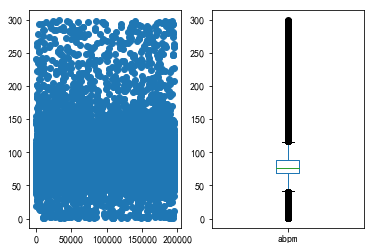

In [50]:
plt.subplot2grid((1,2),(0,0))
plt.scatter(range(len(data)),data['abpm'])
plt.subplot2grid((1,2),(0,1))
data['abpm'].plot.box()

In [65]:
#有66个样本，无创收缩压<无创平均压，肯定是异常值
temp=data['nbps']<data['nbpm']
temp.sum()

43

In [66]:
#有226个样本，无创舒张压>无创平均压，肯定是异常值
temp=data['nbpd']>data['nbpm']
temp.sum()

145

In [67]:
#有1336个样本，有创收缩压<有创平均压，肯定是异常值
temp=data['abps']<data['abpm']
temp.sum()

1282

In [68]:
#有811个样本，有创舒张压>有创平均压，肯定是异常值
temp=data['abpd']>data['abpm']
temp.sum()

608

In [61]:
data.loc[temp,['nbps','nbpm','nbpd','abps','abpm','abpd']]
#通过对数据观察，我觉得有可能是在数据匹配过程中出现的问题，
#有可能当血压缺失时，我会寻找前6小时的数据，这样并不能代表患者的真实情况，
#所以4-6小时这个时间段有可能还是会带来很多噪声，我应该适当减小这个数值

,nbps,nbpm,nbpd,abps,abpm,abpd
155,86.0,51.333302,34.0,92.0,62.0,67.0
292,102.0,53.333302,29.0,220.0,53.0,115.0
342,NaN,NaN,NaN,114.0,37.0,55.0
356,NaN,NaN,NaN,97.0,60.0,63.0
1018,NaN,NaN,NaN,167.0,29.0,55.0
1363,NaN,NaN,NaN,134.0,80.0,84.0
1445,NaN,NaN,NaN,142.0,58.0,75.0
1455,106.0,66.666702,47.0,96.0,27.0,67.0
1632,140.0,87.333298,61.0,112.0,40.0,66.0
1714,NaN,NaN,NaN,128.0,81.0,98.0


考虑到匹配血压的过程使用的是某一个时间点前后6小时的数据，觉得不合理，改为前4个小时，发现异常数据有所减少，要想完全避免，只能是时间点完全吻合

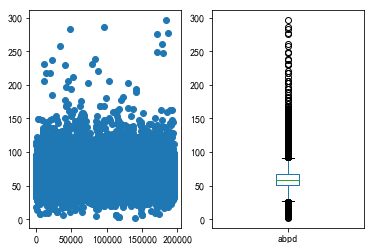

In [69]:
plt.subplot2grid((1,2),(0,0))
plt.scatter(range(len(data)),data['abpd'])
plt.subplot2grid((1,2),(0,1))
data['abpd'].plot.box()

In [77]:
data.columns.values

array(['subject_id', 'hadm_id', 'icustay_id', 'charttime', 'pao2', 'spo2',
       'fio2', 'hr', 'temp', 'nbps', 'nbpd', 'nbpm', 'abps', 'abpd',
       'abpm', 'rr', 'tv', 'pip', 'plap', 'mv', 'map', 'peep', 'gcsmotor',
       'gcsverbal', 'gcseyes', 'first_careunit', 'last_careunit',
       'dbsource', 'age', 'ethnicity', 'admission_type', 'gender',
       'height_first', 'height_min', 'height_max', 'weight_first',
       'weight_min', 'weight_max'], dtype=object)

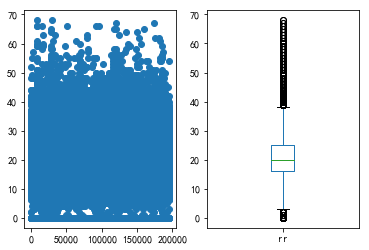

In [78]:
plt.subplot2grid((1,2),(0,0))
plt.scatter(range(len(data)),data['rr'])
plt.subplot2grid((1,2),(0,1))
data['rr'].plot.box()
#呼吸频率中这么多的0 ，到底是怎么回事，这数据质量真的是堪忧啊


In [86]:
data['rr'].describe()

count    194409.000000
mean         20.546251
std           6.867790
min           0.000000
25%          16.000000
50%          20.000000
75%          25.000000
max          68.000000
Name: rr, dtype: float64

In [113]:
temp=data.rr.value_counts()

In [115]:
temp.index.values

array([ 20.  ,  18.  ,  16.  ,  14.  ,  22.  ,  24.  ,  12.  ,  19.  ,
        21.  ,  17.  ,  26.  ,  23.  ,  15.  ,  25.  ,  28.  ,  30.  ,
        27.  ,  10.  ,  13.  ,  29.  ,  32.  ,  11.  ,  31.  ,  34.  ,
        33.  ,  35.  ,   0.  ,  36.  ,   8.  ,   9.  ,  38.  ,  37.  ,
        40.  ,   7.  ,  39.  ,   6.  ,  42.  ,  41.  ,   5.  ,  43.  ,
        44.  ,   4.  ,  45.  ,  46.  ,  48.  ,  47.  ,   3.  ,  50.  ,
        49.  ,  51.  ,  55.  ,   2.  ,  53.  ,  52.  ,  54.  ,  56.  ,
         1.  ,  58.  ,  59.  ,  60.  ,  66.  ,  57.  ,  63.  ,  62.  ,
        61.  ,  65.  ,  64.  ,  67.  ,  68.  ,   0.17])

<Container object of 70 artists>

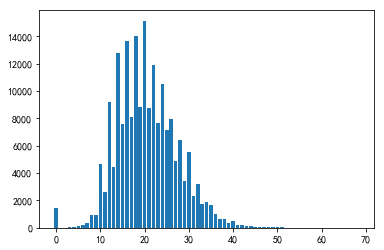

In [117]:
plt.bar(temp.index.values,list(temp))
#可以看出呼吸频率的一个分布情况，有不小的比例的rr=0，这部分数据如何处理还需要进一步讨论

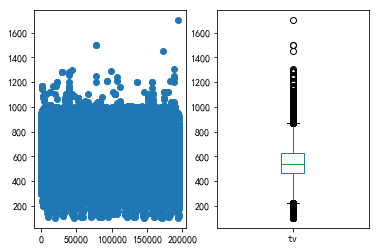

In [118]:
plt.subplot2grid((1,2),(0,0))
plt.scatter(range(len(data)),data['tv'])
plt.subplot2grid((1,2),(0,1))
data['tv'].plot.box()
#这里的潮气量是总的潮气量，与rr运算后可得到一般的，但是运算还是要注意，防止与rr=0进行除法运算
#整体分布正常，有个别异常点，

In [127]:
data.loc[data['tv']>1500,['icustay_id','tv','mv','weight_first','rr']]

,icustay_id,tv,mv,weight_first,rr
194343,270587,1700.0,12.6,109.0,17.0


这个人的的tv还是有点异常，通过tv和rr计算的mv=28左右，而实际mv只有12.6，正常tv应该在700-800左右，所以这样的点该如何处理

In [128]:
data.loc[data['icustay_id']==270587,['tv','mv','weight_first','rr']]

,tv,mv,weight_first,rr
194343,1700.0,12.6,109.0,17.0
194344,562.0,10.3,109.0,10.0
194345,514.0,9.2,109.0,9.0
194346,513.0,10.9,109.0,17.0
194347,622.0,10.4,109.0,18.0
194348,622.0,10.4,109.0,22.0
194349,633.0,13.6,109.0,22.0
194350,684.0,14.4,109.0,22.0
194351,684.0,14.4,109.0,22.0


再一次确定了我们的猜想，这个的确是一个异常值

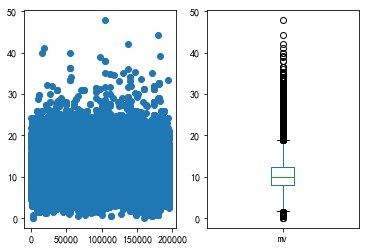

In [132]:
plt.subplot2grid((1,2),(0,0))
plt.scatter(range(len(data)),data['mv'])
plt.subplot2grid((1,2),(0,1))
data['mv'].plot.box()

<Container object of 1830 artists>

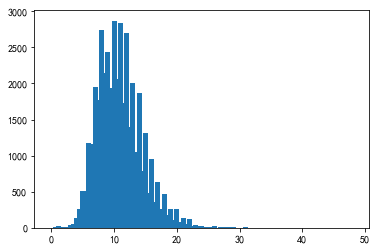

In [133]:
temp=data.mv.value_counts()
temp.index.values
plt.bar(temp.index.values,list(temp))

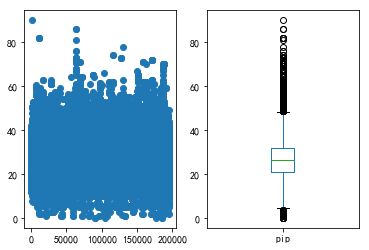

In [129]:
plt.subplot2grid((1,2),(0,0))
plt.scatter(range(len(data)),data['pip'])
plt.subplot2grid((1,2),(0,1))
data['pip'].plot.box()

# 压力相关生理参数的分析
1、 PIP 最大吸气压力

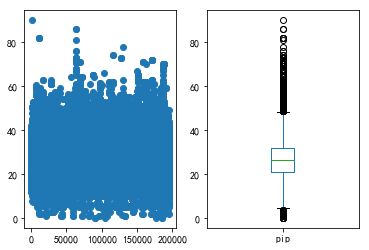

In [150]:
plt.subplot2grid((1,2),(0,0))
plt.scatter(range(len(data)),data['pip'])
plt.subplot2grid((1,2),(0,1))
data['pip'].plot.box()

<Container object of 500 artists>

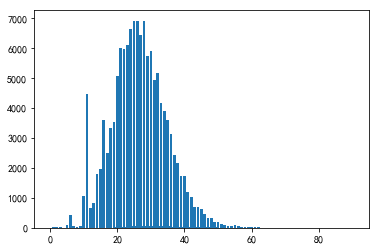

In [130]:
temp=data.pip.value_counts()
temp.index.values
plt.bar(temp.index.values,list(temp))

In [131]:
temp
#发现有一个比较突出的pip=11的情况，是的数据不符合正态分布，这也算是一个异常情况

28.000000    6920
26.000000    6919
25.000000    6912
24.000000    6657
27.000000    6450
23.000000    6125
21.000000    6015
22.000000    5985
30.000000    5910
29.000000    5744
32.000000    5160
20.000000    5067
31.000000    4952
11.000000    4474
33.000000    4182
34.000000    3901
35.000000    3614
16.000000    3604
19.000000    3521
18.000000    3348
36.000000    3150
17.000000    2487
37.000000    2447
38.000000    2180
15.000000    1968
14.000000    1806
40.000000    1737
39.000000    1731
41.000000    1205
10.000000    1047
             ... 
59.900002       1
57.500000       1
90.000000       1
8.600000        1
81.000000       1
59.599998       1
14.800000       1
10.200000       1
8.700000        1
14.600000       1
7.300000        1
56.299999       1
67.599998       1
70.500000       1
7.500000        1
60.400002       1
53.299999       1
9.300000        1
8.250000        1
60.599998       1
39.389999       1
16.100000       1
10.600000       1
66.900002       1
12.500000 

2、MAP气道平均压力的分析

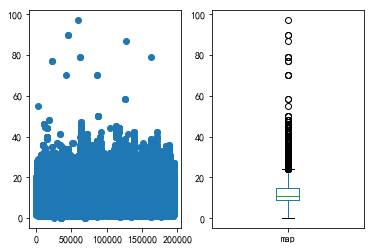

In [151]:
plt.subplot2grid((1,2),(0,0))
plt.scatter(range(len(data)),data['map'])
plt.subplot2grid((1,2),(0,1))
data['map'].plot.box()

<Container object of 400 artists>

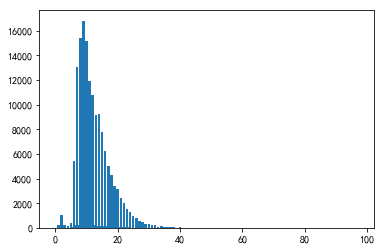

In [136]:
temp=data.map.value_counts()
temp.index.values
plt.bar(temp.index.values,list(temp))

3、plap 平台压力分析

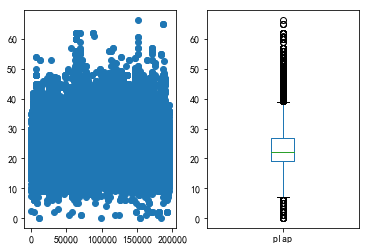

In [153]:
plt.subplot2grid((1,2),(0,0))
plt.scatter(range(len(data)),data['plap'])
plt.subplot2grid((1,2),(0,1))
data['plap'].plot.box()

<Container object of 420 artists>

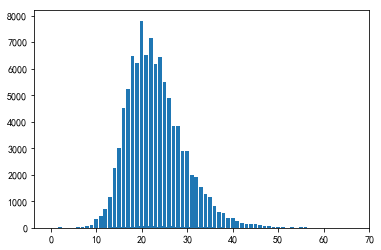

In [154]:
temp=data.plap.value_counts()
temp.index.values
plt.bar(temp.index.values,list(temp))

4、 PEEP 分析

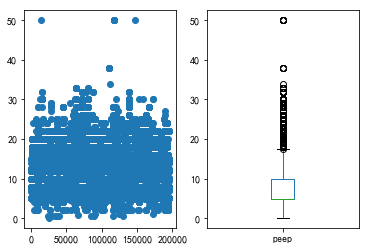

In [155]:
plt.subplot2grid((1,2),(0,0))
plt.scatter(range(len(data)),data['peep'])
plt.subplot2grid((1,2),(0,1))
data['peep'].plot.box()

<Container object of 126 artists>

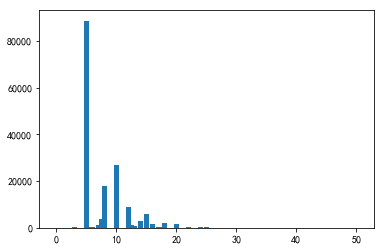

In [156]:
temp=data.peep.value_counts()
temp.index.values
plt.bar(temp.index.values,list(temp))

In [158]:
data.loc[data['peep']>30,['icustay_id','pip','plap','map','peep']]

,icustay_id,pip,plap,map,peep
13388,248199,28.000000,30.000000,20.000000,50.0
14864,249957,55.000000,NaN,44.000000,32.0
14865,249957,55.000000,NaN,44.000000,32.0
63084,286981,67.000000,60.000000,46.000000,33.0
63085,286981,67.000000,NaN,45.000000,33.0
63086,286981,67.000000,NaN,45.000000,33.0
63087,286981,66.900002,NaN,45.599998,33.0
63088,286981,68.000000,NaN,46.000000,33.0
63089,286981,68.000000,62.000000,46.000000,33.0
63090,286981,68.000000,62.000000,44.000000,33.0


这里我选出了一些异常的peep，通过这几个压力参数的分布及其实际意义，我们做了假设

关于几个压力的关系：
pip>plap>map>peep

In [140]:
data.loc[:8,['pip','plap','map','peep']]
#我的猜测是正确的，pip是气道峰压，应该是这几个压力值中，最高的
#plap是气道平台压，map是气道平均压，peep应该是这里面最小的
#pip>plap>map>peep

,pip,plap,map,peep
0,35.0,20.0,15.0,10.0
1,37.0,25.0,16.0,10.0
2,36.0,30.0,17.0,10.0
3,35.0,26.0,17.0,10.0
4,35.0,26.0,17.0,10.0
5,34.0,24.0,15.0,10.0
6,34.0,24.0,15.0,10.0
7,35.0,25.0,15.0,NaN
8,35.0,25.0,15.0,NaN


我们计算四种压力的平均值，也可以看出，这种大小关系

In [161]:
data['pip'].mean()

26.8193048733762

In [162]:
data['plap'].mean()

23.151257023586798

In [163]:
data['map'].mean()

12.367805509345413

In [164]:
data['peep'].mean()

7.837410583588448

我们可以利用这些约束关系来处理异常值

In [145]:
data.loc[data['pip']<data['map'],['icustay_id','pip','plap','map','peep']]

,icustay_id,pip,plap,map,peep
2424,298056,7.50,NaN,15.6,12.7
3210,209498,34.00,21.0,55.0,5.0
8803,273137,7.00,NaN,8.0,5.0
8804,273137,7.00,NaN,8.0,5.0
9696,200286,6.00,NaN,7.0,5.0
9717,282701,22.00,35.0,24.0,20.0
10176,208409,14.00,21.0,18.0,8.0
10222,239032,11.00,NaN,13.0,10.0
10957,245121,3.00,NaN,6.0,5.0
12226,244922,2.10,NaN,8.2,5.0


In [146]:
data.loc[data['pip']<data['plap'],['icustay_id','pip','plap','map','peep']]

,icustay_id,pip,plap,map,peep
60,209821,14.000000,16.0,7.0,5.0
151,201741,27.000000,27.1,17.0,12.5
155,201741,24.799999,26.0,14.9,12.5
302,268104,19.000000,21.0,12.0,8.0
308,283748,24.000000,28.0,14.0,5.0
309,283748,24.000000,28.0,14.0,5.0
320,203121,26.000000,27.0,14.0,5.0
541,209016,19.000000,30.0,15.0,12.0
586,209016,26.000000,27.0,19.0,14.0
588,209016,20.000000,26.0,16.0,8.0


In [147]:
#pip = 最大吸气压力，paek pressure 一般在9-16 一般不应该超过35-40
data.pip.describe()

count    140032.000000
mean         26.819305
std           8.373100
min           0.200000
25%          21.000000
50%          26.600000
75%          32.000000
max          90.000000
Name: pip, dtype: float64

In [ ]:
'gcsmotor',
       'gcsverbal', 'gcseyes', 'first_careunit', 'last_careunit',
       'dbsource', 'age', 'ethnicity', 'admission_type', 'gender',
       'height_first', 'height_min', 'height_max', 'weight_first',
       'weight_min', 'weight_max']

GCS 分析
<br>三种评分分开看，而不是直接观察总值,其中分值越低，病人病情越严重
<br>gcsmotor 最佳运动反应 1-6分,
<br>gcsverbal 语言反应 1-5
<br>gcseyes 睁眼运动 1-4

gcsmotor 最佳运动反应 1-6

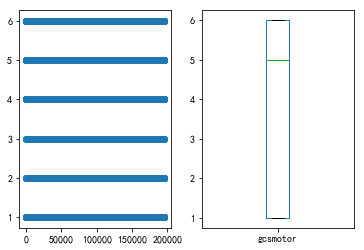

In [166]:
plt.subplot2grid((1,2),(0,0))
plt.scatter(range(len(data)),data['gcsmotor'])
plt.subplot2grid((1,2),(0,1))
data['gcsmotor'].plot.box()

<Container object of 6 artists>

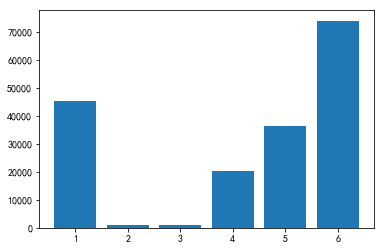

In [168]:
temp=data.gcsmotor.value_counts()
temp.index.values
plt.bar(temp.index.values,list(temp))

gcsverbal 语言反应 1-5 

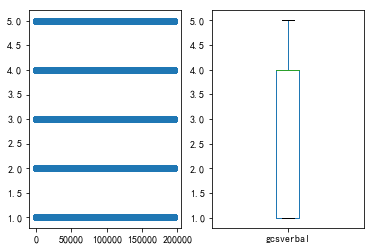

In [169]:
plt.subplot2grid((1,2),(0,0))
plt.scatter(range(len(data)),data['gcsverbal'])
plt.subplot2grid((1,2),(0,1))
data['gcsverbal'].plot.box()

<Container object of 5 artists>

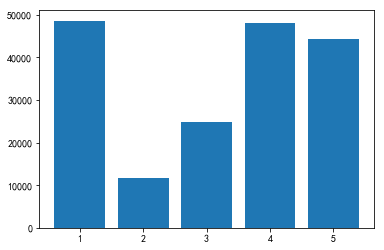

In [172]:
temp=data.gcsverbal.value_counts()
temp.index.values
plt.bar(temp.index.values,list(temp))

gcseyes 睁眼运动 1-4

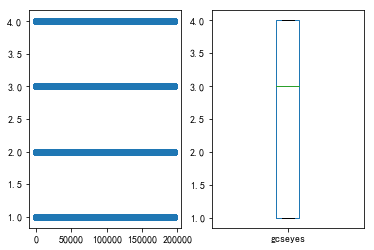

In [173]:
plt.subplot2grid((1,2),(0,0))
plt.scatter(range(len(data)),data['gcseyes'])
plt.subplot2grid((1,2),(0,1))
data['gcseyes'].plot.box()

<Container object of 4 artists>

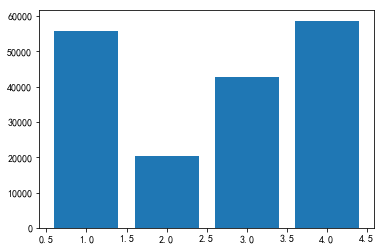

In [174]:
temp=data.gcseyes.value_counts()
temp.index.values
plt.bar(temp.index.values,list(temp))

病人基本信息统计

In [188]:
g = data.groupby(['first_careunit'])
df = pd.DataFrame(g.count()['subject_id'])
print(df)

                subject_id
first_careunit            
CCU                  21279
CSRU                 63272
MICU                 51047
SICU                 29841
TSICU                30327


冠心病监护室 CCU<br>
心脏手术恢复单元 CSRU<br>
内科重症监护病房 MICU<br>
外科重症监护病房 SICU<br>
创伤外科重症监护病房 TSICU

<Container object of 8362 artists>

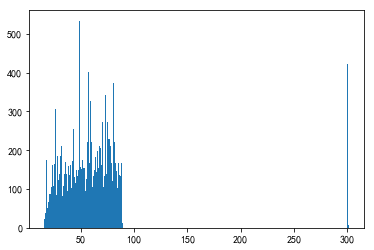

In [195]:
temp=data.age.value_counts()
temp.index.values
plt.bar(temp.index.values,list(temp))
#忘记处理年龄了，大于300的统一为91.4

In [198]:
data.columns.values

array(['subject_id', 'hadm_id', 'icustay_id', 'charttime', 'pao2', 'spo2',
       'fio2', 'hr', 'temp', 'nbps', 'nbpd', 'nbpm', 'abps', 'abpd',
       'abpm', 'rr', 'tv', 'pip', 'plap', 'mv', 'map', 'peep', 'gcsmotor',
       'gcsverbal', 'gcseyes', 'first_careunit', 'last_careunit',
       'dbsource', 'age', 'ethnicity', 'admission_type', 'gender',
       'height_first', 'height_min', 'height_max', 'weight_first',
       'weight_min', 'weight_max'], dtype=object)

In [200]:
g = data.groupby(['dbsource'])
df = pd.DataFrame(g.count()['subject_id'])
print(df)

            subject_id
dbsource              
both              1032
carevue         138135
metavision       56599


In [202]:
g = data.groupby(['ethnicity'])
df = pd.DataFrame(g.count()['subject_id'])
print(df)
#种族分类

                                            subject_id
ethnicity                                             
AMERICAN INDIAN/ALASKA NATIVE                      193
ASIAN                                             2181
ASIAN - ASIAN INDIAN                               305
ASIAN - CAMBODIAN                                   15
ASIAN - CHINESE                                    901
ASIAN - FILIPINO                                    23
ASIAN - JAPANESE                                    14
ASIAN - KOREAN                                       7
ASIAN - OTHER                                       97
ASIAN - THAI                                         7
ASIAN - VIETNAMESE                                  99
BLACK/AFRICAN                                      248
BLACK/AFRICAN AMERICAN                           10597
BLACK/CAPE VERDEAN                                 419
BLACK/HAITIAN                                      468
HISPANIC OR LATINO                                4723
HISPANIC/L

In [203]:
g = data.groupby(['admission_type'])
df = pd.DataFrame(g.count()['subject_id'])
print(df)

                subject_id
admission_type            
ELECTIVE             34548
EMERGENCY           153094
URGENT                8124


关于身高体重

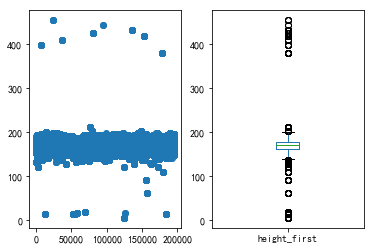

In [204]:
plt.subplot2grid((1,2),(0,0))
plt.scatter(range(len(data)),data['height_first'])
plt.subplot2grid((1,2),(0,1))
data['height_first'].plot.box()

<Container object of 83 artists>

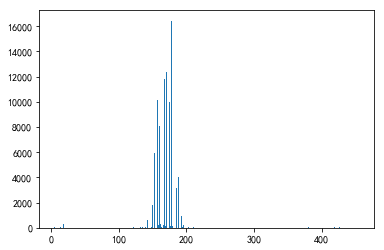

In [205]:
temp=data.height_first.value_counts()
temp.index.values
plt.bar(temp.index.values,list(temp))

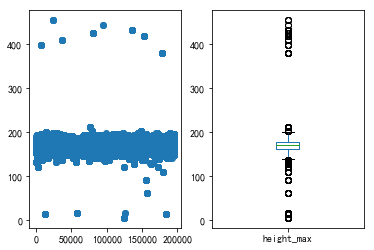

In [207]:
plt.subplot2grid((1,2),(0,0))
plt.scatter(range(len(data)),data['height_max'])
plt.subplot2grid((1,2),(0,1))
data['height_max'].plot.box()

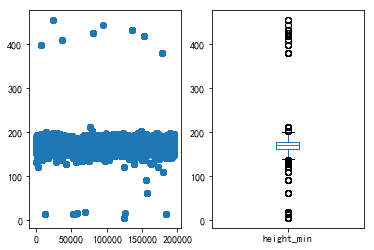

In [208]:
plt.subplot2grid((1,2),(0,0))
plt.scatter(range(len(data)),data['height_min'])
plt.subplot2grid((1,2),(0,1))
data['height_min'].plot.box()

通过对三种身高进行分析可以看出，first max min 没有明显的差异，异常值也比较固定，可以认为100-200之外的都是异常

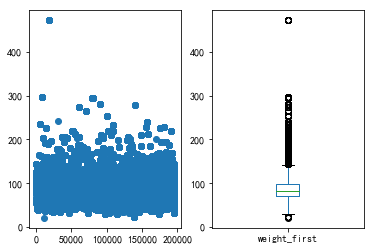

In [209]:
plt.subplot2grid((1,2),(0,0))
plt.scatter(range(len(data)),data['weight_first'])
plt.subplot2grid((1,2),(0,1))
data['weight_first'].plot.box()

对于异常值的处理，不同参数处理的方式不一样，异常值的比例也会影响的吹了方式。<br>
最简单直接的方法，就是将异常值，全部设为null，之后再用插值方法补全，尽可能的不造成整体数据信息的损失

In [4]:
import knnimpute

In [5]:
help(knnimpute)

Help on package knnimpute:

NAME
    knnimpute

PACKAGE CONTENTS
    argpartition
    common
    few_observed_entries
    normalized_distance
    optimistic
    reference

FUNCTIONS
    all_pairs_normalized_distances(X)
        We can't really compute distances over incomplete data since
        rows are missing different numbers of entries.
        The next best thing is the mean squared difference between two vectors
        (a normalized distance), which gets computed only over the columns that
        two vectors have in common. If two vectors have no features in common
        then their distance is infinity.
        
        Parameters
        ----------
        X : np.ndarray
            Data matrix of shape (n_samples, n_features) with missing entries
            marked using np.nan
        
        Returns a (n_samples, n_samples) matrix of pairwise normalized distances.
    
    all_pairs_normalized_distances_reference(X)
        Reference implementation of normalized all-pai